In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.simplefilter(action='ignore')
import researchpy as rp
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Reading the datasets 
wikihow_subset = pd.read_csv('./datasets/wikihow_sep_subset.csv') 
wikihow = pd.read_csv('./datasets/wikihow_sep_features.csv')

## Testing the difference of mean values of sentence lengths (Bootstrapping) 

/Users/sarabouazzaoui/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/sarabouazzaoui/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'Distribution of sentence lengths')

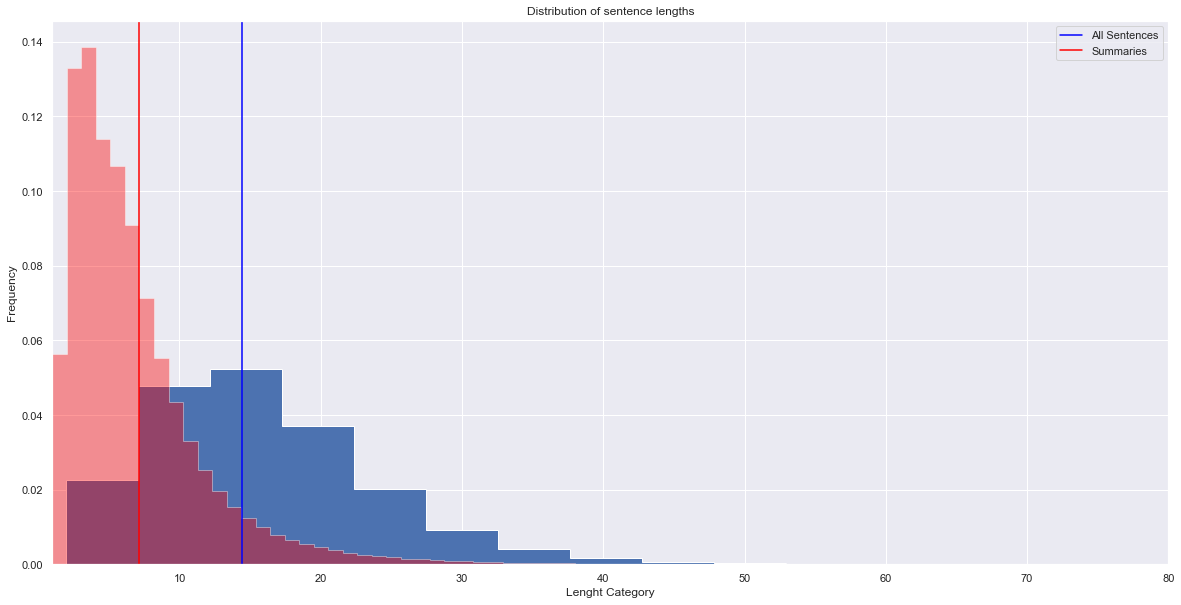

In [3]:
only_summaries = wikihow[wikihow['is_summary'] == 'yes']['sentence_len']
non_summary = wikihow[wikihow['is_summary'] == 'no']['sentence_len']
plt.figure(figsize=(20,10))
plt.hist(non_summary,bins = 200, normed=True,histtype="stepfilled")
plt.hist(only_summaries,bins = 250, normed=True,histtype="stepfilled", color = 'red', alpha = 0.4)
plt.axvline(wikihow['sentence_len'].mean(), color = 'blue')
plt.axvline(only_summaries.mean(), color = 'red')
plt.xlim((1, 80)) 
plt.xlabel('Lenght Category')
plt.ylabel('Frequency')
plt.legend(['All Sentences','Summaries'],loc = 'upper right')
plt.title('Distribution of sentence lengths')

In [4]:
# Reconstructing the mean under the null hypothesis
# Compute the combined mean of the dataset
combined_mean = wikihow_subset['sentence_len'].mean()

# First shift the samples Should I shift the median ? 
summary = wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'] - wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'].mean() + combined_mean
no_summary = wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len'] - wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len'].mean() + combined_mean


In [5]:
#Get bootstrap replicates for shifted data 
np.random.seed(47)
N_rep = 10000

#Initialize empty array of same size than reps
bs_mean_diffs = np.empty(10000)

for rep in range(N_rep):
    
    # Generate bootstrap sample: bs_sample
    summarized = np.random.choice(summary, size=len(summary))
    no_sumarized = np.random.choice(no_summary, size=len(no_summary))
    bs_mean_summary = np.mean(summarized)
    bs_mean_no_summary = np.mean(no_sumarized)
    
    # Computing differences in means
    bs_mean_diff = bs_mean_no_summary - bs_mean_summary
    bs_mean_diffs[rep] = bs_mean_diff

In [6]:
bs_mean_diffs

array([-0.00135776, -0.02876964, -0.03819738, ..., -0.00387366,
       -0.09362474, -0.01888571])

In [7]:
# Calculating confidence interval 
conf_int = np.percentile(bs_mean_diffs, [2.5, 97.5])
conf_int

array([-0.07809943,  0.07814123])

In [8]:
#Calculating the p-value
mean_diff = np.mean(wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len']) - np.mean(wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'])
# Compute the p-value
p = np.sum(bs_mean_diffs >= mean_diff) / len(bs_mean_diffs)
p

0.0

In [9]:
mean_diff

10.270715155777145

In [10]:
bs_mean_diffs

array([-0.00135776, -0.02876964, -0.03819738, ..., -0.00387366,
       -0.09362474, -0.01888571])

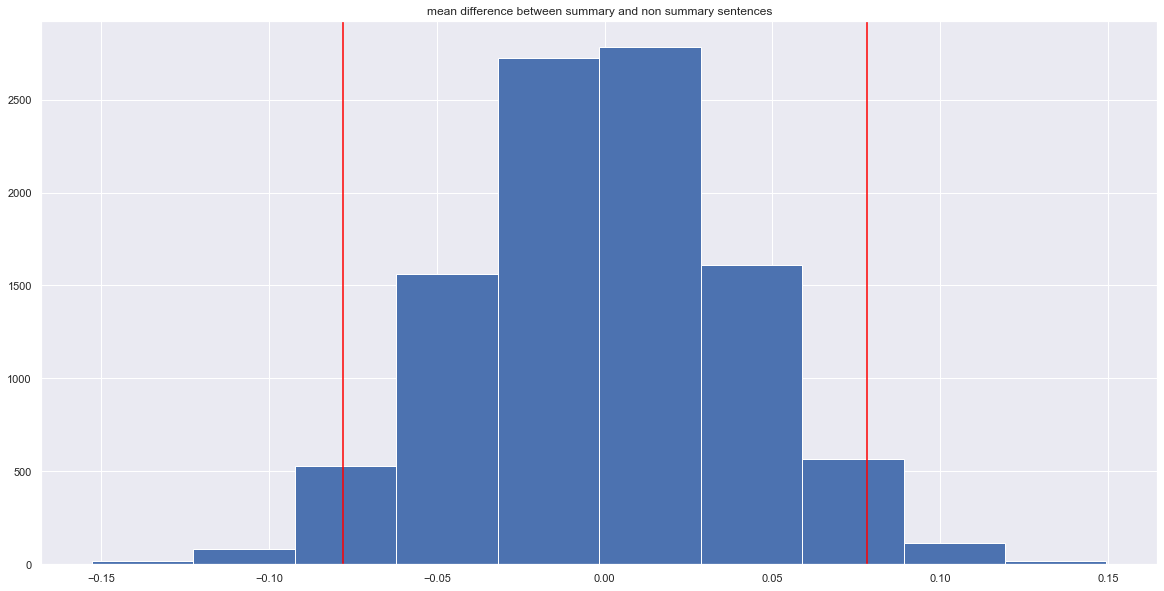

In [11]:
plt.figure(figsize=(20,10))
plt.hist(bs_mean_diffs)
plt.title('mean difference between summary and non summary sentences')
plt.axvline(conf_int[0], color = 'red')
plt.axvline(conf_int[1], color = 'red')
#plt.axvline(mean_diff, color = 'green')
plt.show()

**Null hypothesis**: There is no difference the average sentence length of a summary sentence and the average sentence length of a non summary sentence.

**Alternative hypothesis**:There is a difference the average sentence length of a summary sentence and the average sentence length of a non summary sentence.

The p-value = 0: we can reject the null hypothesis and assume the average sentence length for a summary sentence is significantly smaller than the sentence length for a non summary sentence

## Testing the difference of median values of sentence lengths (Bootstrapping) 

/Users/sarabouazzaoui/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/sarabouazzaoui/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 1.0, 'Distribution of sentence lengths')

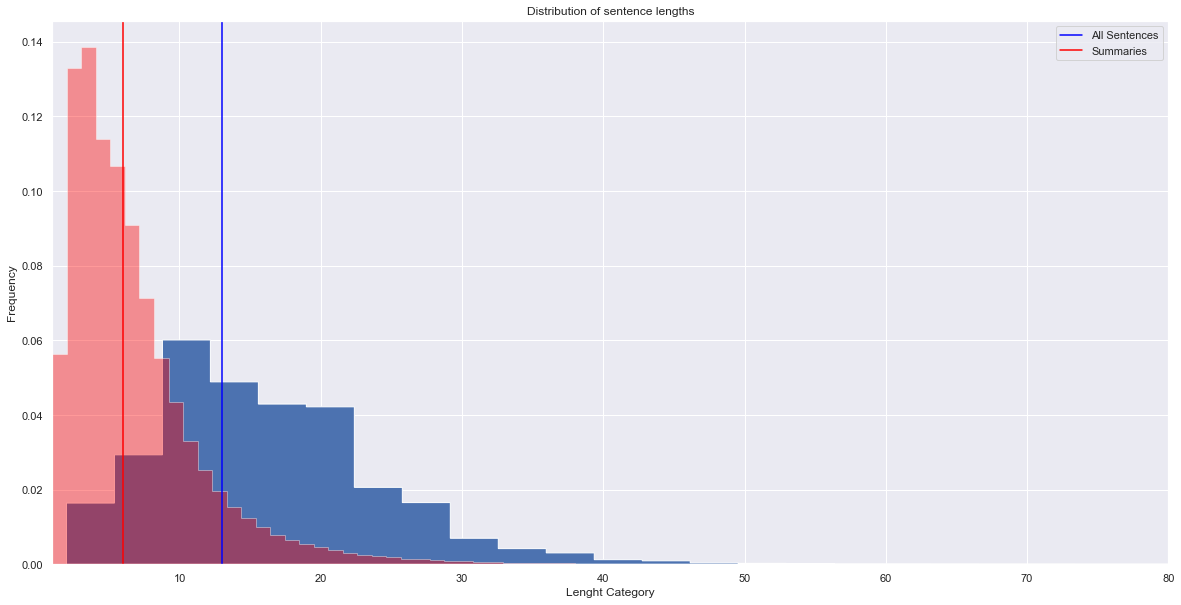

In [12]:
only_summaries = wikihow[wikihow['is_summary'] == 'yes']['sentence_len']
non_summary = wikihow[wikihow['is_summary'] == 'no']['sentence_len']
plt.figure(figsize=(20,10))
plt.hist(non_summary,bins = 300, normed=True,histtype="stepfilled")
plt.hist(only_summaries,bins = 250, normed=True,histtype="stepfilled", color = 'red', alpha = 0.4)
plt.axvline(wikihow['sentence_len'].median(), color = 'blue')
plt.axvline(only_summaries.median(), color = 'red')
plt.xlim((1, 80)) 
plt.xlabel('Lenght Category')
plt.ylabel('Frequency')
plt.legend(['All Sentences','Summaries'],loc = 'upper right')
plt.title('Distribution of sentence lengths')

In [13]:
# Reconstructing the median under the null hypothesis
# Compute the combined median of the dataset
combined_median = wikihow_subset['sentence_len'].median()

# First shift the samples Should I shift the median ? 
shift_summary = wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'] - wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'].median() + combined_median
shift_no_summary = wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len'] - wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len'].median() + combined_median


In [14]:
#Get bootstrap replicates for shifted data 
np.random.seed(42)
N_rep = 10000

#Initialize empty array of same size than reps
bs_median_diffs = np.empty(10000)

for rep in range(N_rep):
    
    # Generate bootstrap sample: bs_sample
    summarized = np.random.choice(shift_summary, size=len(summary))
    no_sumarized = np.random.choice(shift_no_summary, size=len(no_summary))
    bs_median_summary = np.median(summarized)
    bs_median_no_summary = np.median(no_sumarized)
    
    # Computing differences in means
    bs_median_diff = bs_median_no_summary - bs_median_summary
    bs_median_diffs[rep] = bs_median_diff

In [15]:
bs_median_diffs

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
# Calculating confidence interval 
conf_int = np.percentile(bs_median_diffs, [2.5, 97.5])
conf_int

array([0., 0.])

In [17]:
#Calculating the p-value
median_diff = np.median(wikihow_subset[wikihow_subset['is_summary'] == 'no']['sentence_len']) - np.median(wikihow_subset[wikihow_subset['is_summary'] == 'yes']['sentence_len'])
# Compute the p-value
p = np.sum(bs_median_diffs >= median_diff) / len(bs_median_diffs)
p

0.0

In [18]:
median_diff

10.0

In [19]:
bs_median_diffs

array([0., 0., 0., ..., 0., 0., 0.])

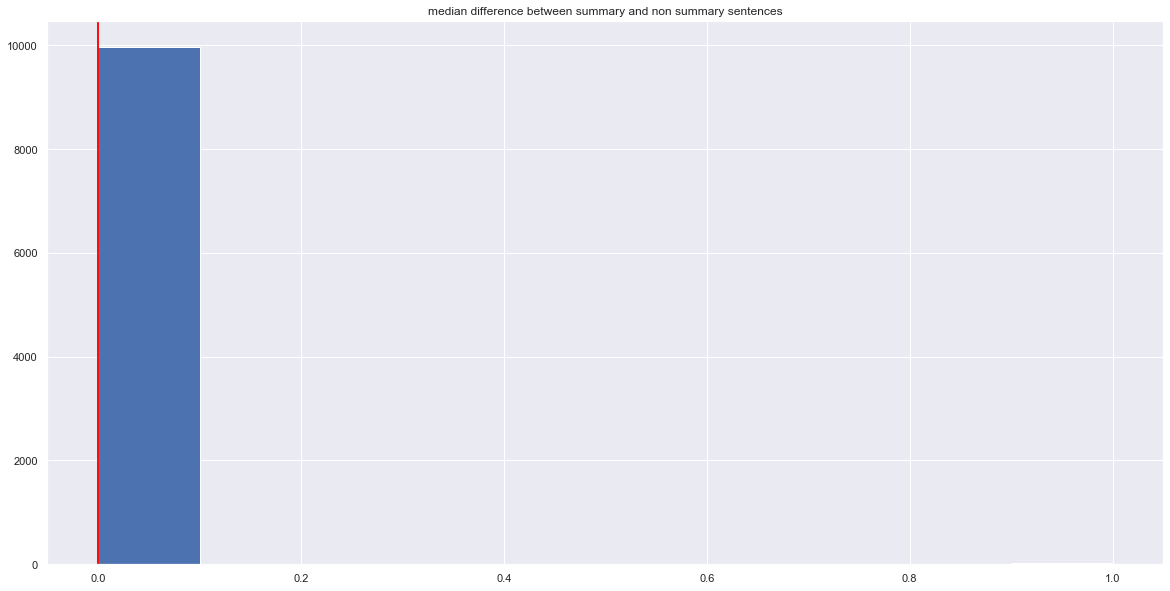

In [22]:
plt.figure(figsize=(20,10))
plt.hist(bs_median_diffs)
plt.title('median difference between summary and non summary sentences')
plt.axvline(conf_int[0], color = 'red')
plt.axvline(conf_int[1], color = 'red')
#plt.axvline(median_diff, color = 'green')
plt.show()

## Testing the difference in proportions of top common word between summary sentences and non summary sentences (Permutation Test)

In [24]:
top_occurences = ['help','use','get', 'make','like','need', 'take', 'try', 
                  'avoid','keep', 'want', 'many', 'ask', 'good', 'find', 'work', 
                  'go', 'include', 'important', 'know']

In [25]:
#Calculating means of 0-1 for summary category and non summary category
occurence_means_summary = dict()
occurence_means_no_summary = dict()
for occurence in top_occurences:
    mean_summary = wikihow_subset[wikihow_subset['is_summary']=='yes'][occurence].mean()
    occurence_means_summary[occurence] = mean_summary
    
    mean_no_summary = wikihow_subset[wikihow_subset['is_summary']=='no'][occurence].mean()
    occurence_means_no_summary[occurence] = mean_no_summary

In [26]:
summary_mean = pd.DataFrame(occurence_means_summary.items(), columns = ['word','mean'])

In [27]:
no_summary_mean = pd.DataFrame(occurence_means_no_summary.items(), columns = ['word','mean'])

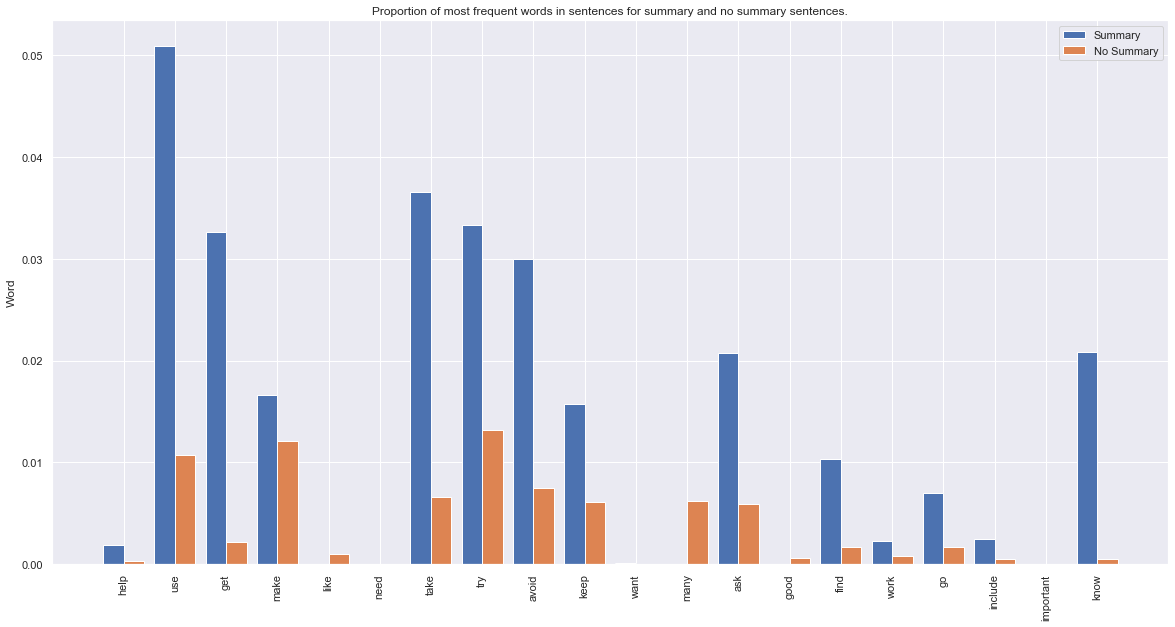

<Figure size 1440x2880 with 0 Axes>

In [28]:
labels = top_occurences
summary_means = summary_mean['mean']
non_summary_means = no_summary_mean['mean']

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
plt.figure(figsize=(20,40))
rects1 = ax.bar(x - width/2, summary_means, width, label='Summary')
rects2 = ax.bar(x + width/2, non_summary_means, width, label='No Summary')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Word')
ax.set_title('Proportion of most frequent words in sentences for summary and no summary sentences.')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

Let's pick the word `make` for example, how likely is it that this word is more present in summary sentences ?

In [29]:
def diff_prop(data_a, data_b):
    frac_a = np.sum(data_a) / len(data_a)
    frac_b = np.sum(data_b) / len(data_b)
    
    return frac_b - frac_a 

In [30]:
make_summary = wikihow_subset[wikihow_subset['is_summary']== 'yes']['make']
make_no_summary = wikihow_subset[wikihow_subset['is_summary']== 'no']['make']

In [31]:
diff_prop_obs_make = diff_prop(make_summary, make_no_summary)
diff_prop_obs_make

-0.004547872704632649

In [32]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [33]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [34]:
perm_replicates = np.empty(10000)
for i in range(10000):
    perm_replicates[i] = draw_perm_reps(make_summary, make_no_summary, diff_prop)

In [36]:
p_value = np.sum(perm_replicates <= diff_prop_obs_make) / len(perm_replicates)

In [37]:
p_value

0.0

The p-value here is so high that we cannot reject the null hypothesis: the word 'make' is not significantly more present in summary sentences.

## Testing for Independence 
* Between `is_summary` and `title_sim_categories`(Chi-Square test)
* Between `tfidf_score` and `title_similarity` (Pearson correlation tests)

### Chi Square test

In [38]:
table, results = rp.crosstab(wikihow_subset['title_sim_categories'], wikihow_subset['is_summary'], prop= 'col', test= 'chi-square')

In [39]:
table

is_summary                
                             no     yes     All
title_sim_categories                           
Medium                    15.10   39.93   19.21
None                       0.14    0.16    0.14
Strong                    79.79   51.90   75.17
Very Strong                3.64    1.47    3.28
Weak                       1.34    6.54    2.20
All                      100.00  100.00  100.00

In [40]:
results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,7766.2301
1,p-value =,0.0000
2,Cramer's V =,0.2787


The null hypothesis is rejected, since p < 0.000, and a conclusion is made that `title_sim` is associated with `is_summary`

### Pearson correlation test

In [41]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

In [42]:
tfidf_score = wikihow_subset['tfidf_score']
title_similarity = wikihow_subset['title_similarity']

Text(0, 0.5, 'title_similarity')

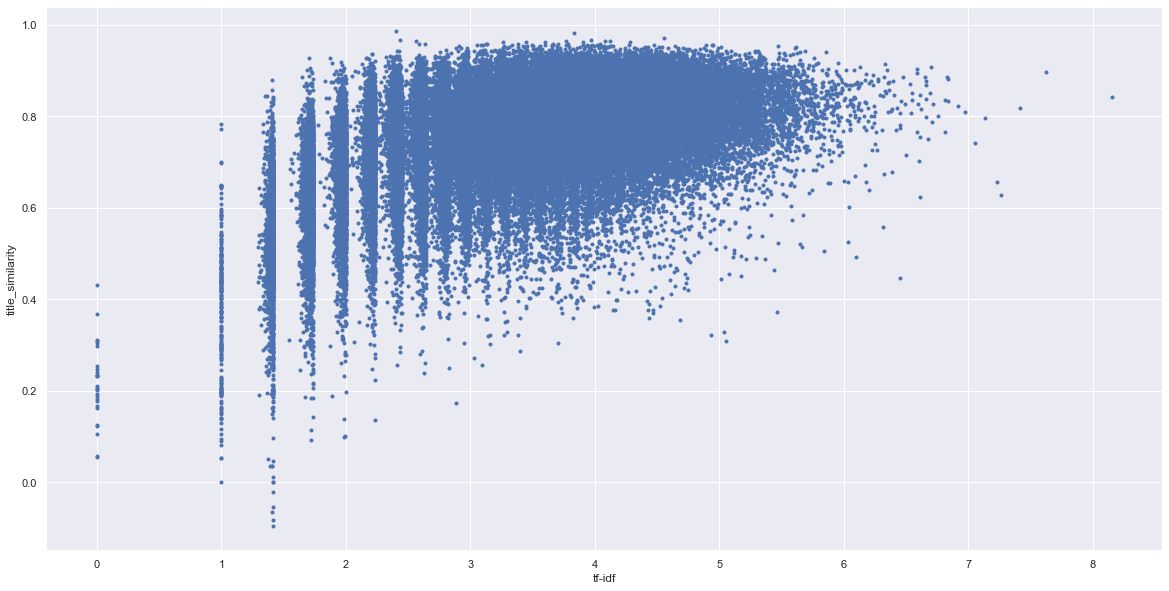

In [50]:
#Scatter plot
plt.figure(figsize=(20,10))
# Make a scatter plot
plt.plot(tfidf_score, title_similarity, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('tf-idf')
plt.ylabel('title_similarity')

These two variables look like they are positively correlated

In [46]:
# Compute observed correlation: r_obs
r_obs = pearson_r(tfidf_score, title_similarity)

In [47]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

In [48]:
# Draw replicates
for i in range(10000):
    # Permute  tfidf scores:
    tfidf_permuted = np.random.permutation(tfidf_score)
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(tfidf_permuted, title_similarity)

In [49]:
# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
p

0.0

The p-value here is quite signifcant which makes our two variables `tfidf_score` and `title_similarity` dependent.